### requests 라이브러리
- 서버에게 데이터를 요청해서 응답받기 위한 라이브러리
- 브라우저의 역할을 대신한다.



In [4]:
# 라이브러리 로딩
import requests as req

In [5]:
# naver 페이지 정보 받아오기

# 사용자 : req, 네이버 메인페이지 정보 좀 알아와줘
# req : 네이버가 어딘지 모름

res = req.get('https://www.naver.com/')
res
# Response [200] : 성공적으로 응답 받았다. 통신 성공!
# Response [400] : 클라이언트(요청)의 문제
# Response [500] : 서버(응답)의 문제

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
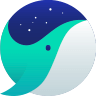
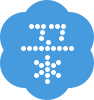

In [8]:
# 요청한 url 주소의 페이지 보기 
res.text

# 결과가 문자열 형태의 데이터 ==> 컴퓨터가 해석하기 어려움..

###  BeautifulSoup 라이브러리 
- 컴퓨터가 이해할 수 있는 언어로 변환해주는 라이브러리 
- bs 객체화

In [7]:
# 넘겨받은 데이터가 text(문자열) 형태임
# 컴퓨터가 접근할 수 있는 html 형태로 변환 해주어야 함!

# BeautifulSoup 라이브러리 로딩
from bs4 import BeautifulSoup as bs

In [11]:
# BeautifulSoup 객체화 ==> bs 객체화
# bs(페이지정보, '파싱방법'(변환방법))
soup = bs(res.text, 'lxml')

In [29]:
soup.select('a.nav')

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [30]:
# naver 페이지에서 '메일' 글자 수집
# select() : 원하는 요소 정보를 가져오는 기능 
# ==> 값을 무조건 리스트로 반환(인덱싱이 필요하다)
soup.select('a.nav')[0]

<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>

In [27]:
# 요소에서 우리가 필요한 순수 컨텐츠만 추출 ==> .text
# 요소란? ==> 태그 + 컨텐츠 (ex. <a 메일></a>)
soup.select('a.nav')[0].text

'메일'

In [35]:
# 메일 카페 블로그 글자 데이터 수집
tag = soup.select('a.nav')

In [39]:
# 메일만 추출
tag[0].text

'메일'

In [49]:
len(tag)

16

In [56]:
# 반복문을 활용해서 모든 데이터를 추출
# range() : 범위를 생성해주는 함수
# range(시작할값, 끝값(포함x), 증감)
for i in range(len(tag)) :
    print(tag[i].text)


메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


###  네이버 날씨에서 온도 데이터 수집
- 네이버 검색창에 '날씨' 검색 후 나오는 온도 데이터 

In [ ]:
# 1. 네이버 날씨 url을 통해 날씨 페이지 정보 가져오기(응답받기)
# 2. bs 객체화 진행 ==> bs(페이지 정보, 'lxml')
# 3. 온도 데이터의 태그 위치를 선택
# 3-1. strong 태그의 구분자가 존재하지 않는다
# 구분자가 존재하지 않는다면 부모태그에게 올라것
# 구분자가 존재하는 태그로 계속해서 올라가야 함!
# div 태그의 자식을 가리키는 부등호 '>'
# .class '>' 자식 , ' '(공백) 자손
# 4. 우리가 필요한 순수 데이터인 컨텐츠만 추출 

In [76]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8'
res_wth = req.get(url)
res_wth

<Response [200]>

In [81]:
soup1 = bs(res_wth.text, 'lxml')
soup1.select('div.temperature_text')[0].text


' 현재 온도16.1° '

In [82]:
# 선생님 풀이
soup1 = bs(res_wth.text, 'lxml')
temp = soup1.select('div.temperature_text > strong')
temp[0].text

'현재 온도16.1°'

In [84]:
# select_one() : 모든 태그 중 가장 상단에 있는 요소만 가져온다.(인덱스 0번)
# select() : 모든 태그를 가져온다. ==> 복수개, [리스트] 형태로 반환
# ==> 그래서 .text를 해줄때에는 반드시 인덱싱을 해줘야한다.
soup1.select_one('div.temperature_text > strong')

<strong><span class="blind">현재 온도</span>16.1<span class="celsius">°</span></strong>

### 네이버 뉴스 타이틀 수집하기

In [ ]:
# 1. 페이지의 정보가 변경될 때마다 다시 요청해 주어야 함
# ==> 페이지의 정보 가져오기
# 2. bs 객체화 진행
# 3. 뉴스 제목 태그 위치 선택
# 4. 컨텐츠 출력(상위 5개 뉴스 제목만 출력)

In [5]:
url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B2%9A%EA%BD%83'
res_news = req.get(url1)
res_news

<Response [200]>

In [8]:
soup2 = bs(res_news.text, 'lxml')
news = soup2.select('a.news_tit')

In [9]:
for i in range(5) :
    print(news[i].text)

"벚꽃 개화는 언제?" 카톡 채널창에 물으니 AI가 답했다
'가평 숨은 벚꽃 명소' 옛 중앙내수면연구소 임시개방
킹덤, 오늘 미니6집 ‘벚꽃 왕국’ 핀다
'벚꽃 명소' 경주엑스포, 벚꽃 버스킹 열린다
벚꽃과 바다를 한 눈에... 거제 최초 '벚꽃축제' 열린다
